In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive #toimport google drive data

In [ ]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/"

/content/drive/My Drive


In [ ]:
cd "SE Dataset/"

/content/drive/My Drive/SE Dataset


In [ ]:
ls

dataset-1/  dataset-20210607T020316Z-001.zip  dataset-20210607T020316Z-003.zip
dataset-2/  dataset-20210607T020316Z-002.zip  dataset-3/


In [ ]:
#load basic libraries
import pandas as pd
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#import the dataset
zf = zipfile.ZipFile('dataset-20210607T020316Z-001.zip') #loading zip file

In [ ]:
df = pd.read_csv(zf.open('dataset/posts_long.csv')) #loading csv file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
tags=df['tags']

In [ ]:
body=df['body']

In [ ]:
title=df['title']

In [ ]:
title[2]

"How do I calculate someone's age in C#?"

In [ ]:
tags[2]

'<c#><.net><datetime>'

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 4.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617788 sha256=d9db47d7c443d9c3d24d0746d296d8edea1fbe0fc4867e58958a2231aea33750
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()
def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
#import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#drop the columns except title column
df=df.drop(labels = ['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'body'], axis=1)

In [ ]:
#import the dataframe
data_raw = df.iloc[:15000,]
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 15000
Number of columns in data = 2


**Sample data:**


,tags,title
0,<c#><floating-point><type-conversion><double><...,Convert Decimal to Double?
1,<html><css><css3><internet-explorer-7>,Percentage width child element in absolutely p...
2,<c#><.net><datetime>,How do I calculate someone's age in C#?
3,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#
4,<javascript><html><browser><timezone><timezone...,Determine a User's Timezone


In [ ]:
#make the tags in the list form
for i in range(len(data_raw)):
  tags=[]
  tg=data_raw['tags'][i].split('>')
  for k in range(len(tg)-1):
    tags.append(tg[k].replace('<',''))
  data_raw['tags'][i]=tags

In [ ]:
data_raw

,tags,title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone
...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...
14997,"[browser, printing, webpage]",link to Print in a webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#


In [ ]:
# Data Cleaning & Preprocessing techniques
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [ ]:
import re
# creating clean text feature
features = ['title']
for feature in features:
    data_raw['clean_' + feature] = data_raw[feature].apply(clean_text)

In [ ]:
data_raw

,tags,title,clean_title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,convert decimal to double
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,how do i calculate someone s age in c
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,calculate relative time in c
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,determine a user s timezone
...,...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access,insert sql command with datetime in ms access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...,what is the difference between function and pr...
14997,"[browser, printing, webpage]",link to Print in a webpage,link to print in a webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#,using c library in c


In [ ]:
#generate the wordcloud
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

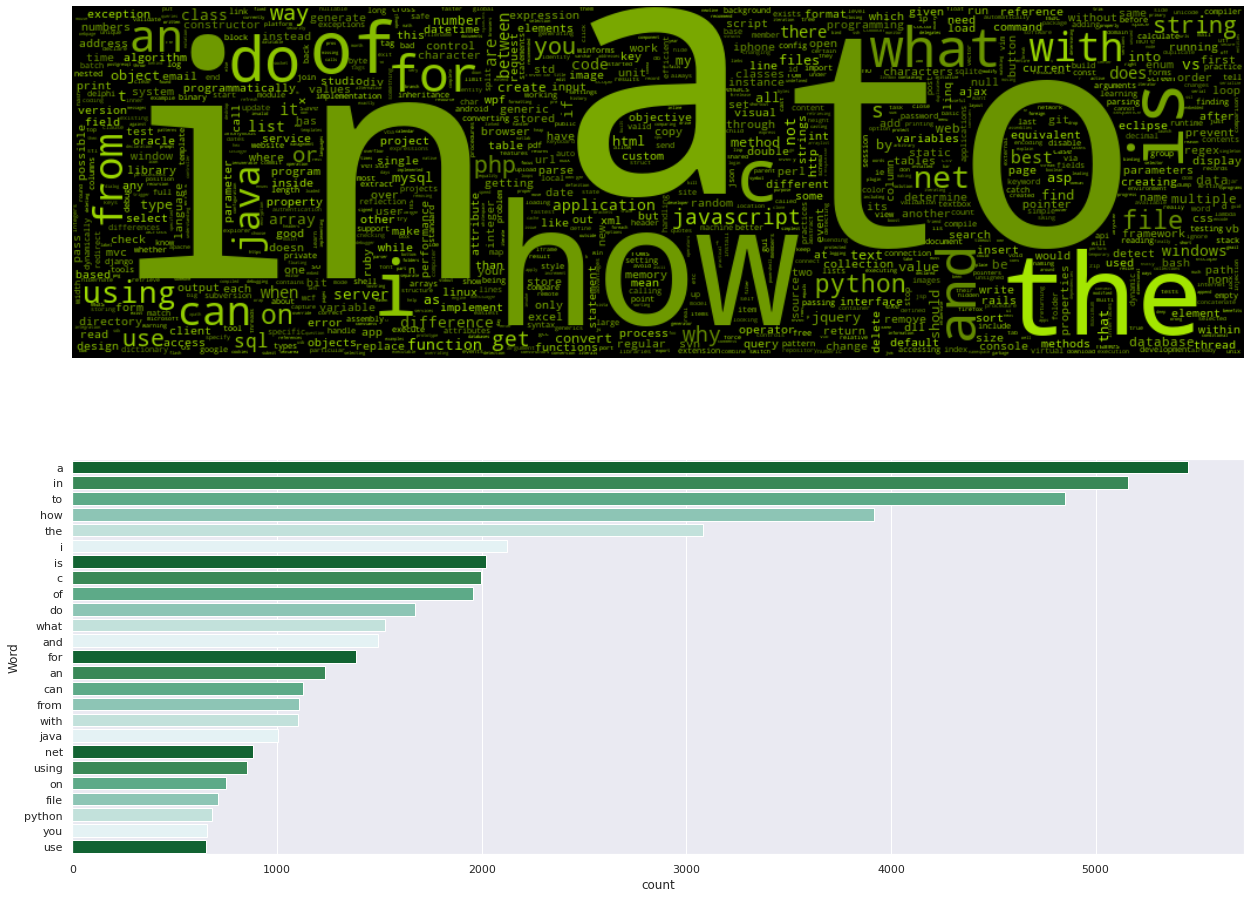

In [ ]:
freq_words(data_raw['clean_title'], 25)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
data_raw['clean_title'] = data_raw['clean_title'].apply(lambda x: remove_stopwords(x))

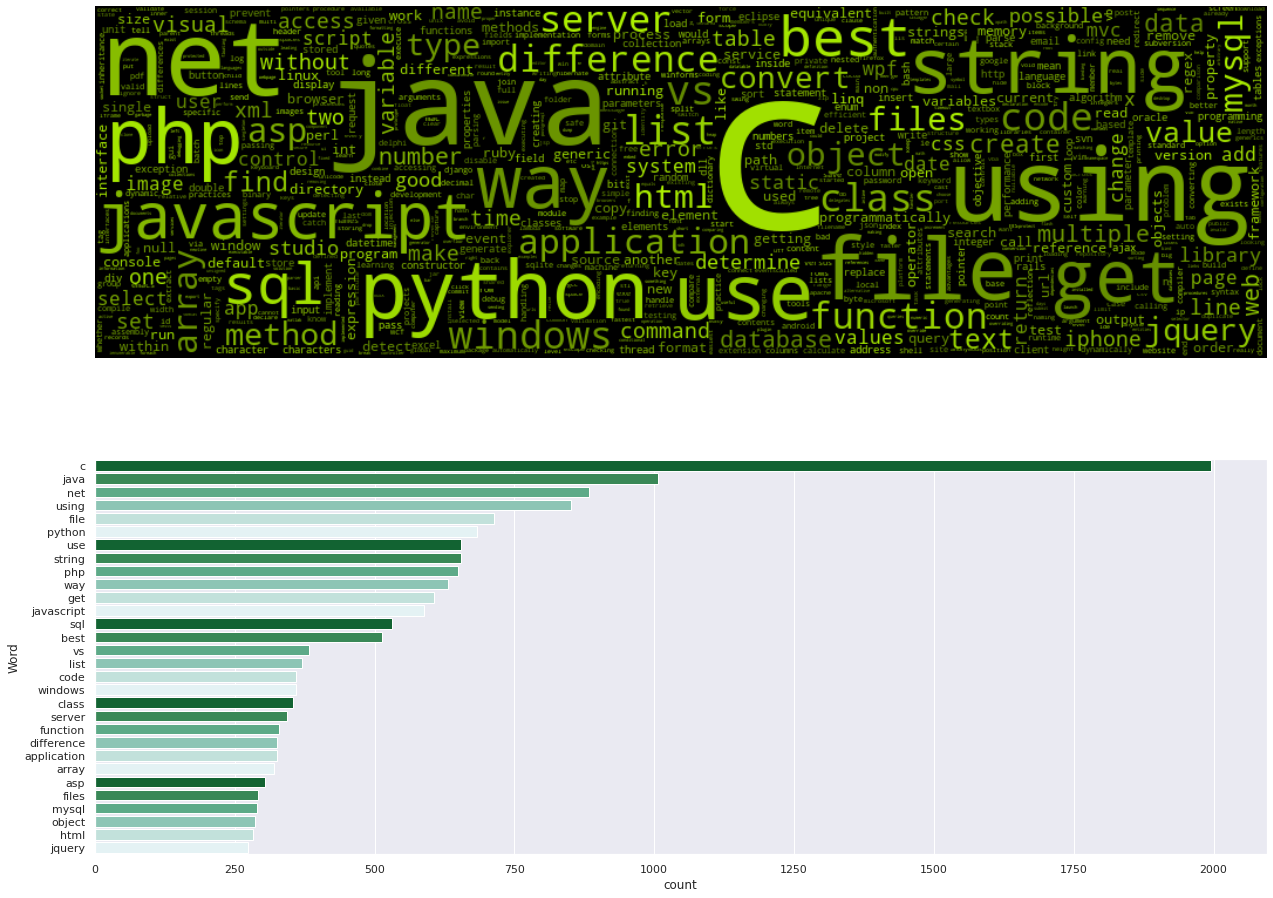

In [ ]:
freq_words(data_raw['clean_title'], 30)

In [ ]:
# get all genre tags in a list
all_tags = sum(data_raw['tags'],[])
len(set(all_tags))

4565

In [ ]:
#count the frequency of tags
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})


In [ ]:
#sort the tags in the count basis
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sort_tag=sorted_tags.head(100)

In [ ]:
count_tag=list(sort_tag['Count'])

In [ ]:
count_tag=count_tag[:18]   #top 18 tags with more than 250 frequency

In [ ]:
tag_list=list(sort_tag['Tag'][:18])   #top 50 tags

In [ ]:
tag_list

['c#',
 'java',
 '.net',
 'c++',
 'javascript',
 'python',
 'php',
 'c',
 'sql',
 'html',
 'asp.net',
 'sql-server',
 'jquery',
 'mysql',
 'windows',
 'string',
 'css',
 'regex']

In [ ]:
data_raw

,tags,title,clean_title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,convert decimal double
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,percentage width child element absolutely posi...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,calculate someone age c
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,calculate relative time c
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,determine user timezone
...,...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access,insert sql command datetime ms access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...,difference function procedure pl sql
14997,"[browser, printing, webpage]",link to Print in a webpage,link print webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#,using c library c


In [ ]:
#select only tags in tag_list

In [ ]:
data_raw_tag=data_raw

In [ ]:
data_raw_tag['tags'][0]

['c#', 'floating-point', 'type-conversion', 'double', 'decimal']

In [ ]:
#filter out the tags that are not present in the top-250 frequency words
for i in range(len(data_raw_tag)):
  tagg=data_raw_tag['tags'][i]
  new_tagg=[]
  for tg in range(len(tagg)):
    if(tagg[tg] in tag_list):
      new_tagg.append(tagg[tg])
  data_raw_tag['tags'][i]=new_tagg

In [ ]:
data_raw_tag

,tags,title,clean_title
0,[c#],Convert Decimal to Double?,convert decimal double
1,"[html, css]",Percentage width child element in absolutely p...,percentage width child element absolutely posi...
2,"[c#, .net]",How do I calculate someone's age in C#?,calculate someone age c
3,[c#],Calculate relative time in C#,calculate relative time c
4,"[javascript, html]",Determine a User's Timezone,determine user timezone
...,...,...,...
14995,[],Insert SQL command with Datetime in MS-Access,insert sql command datetime ms access
14996,[sql],What is the difference between function and pr...,difference function procedure pl sql
14997,[],link to Print in a webpage,link print webpage
14998,[c#],Using c++ library in c#,using c library c


In [ ]:
la=list(data_raw_tag['tags'])
count=0
for i in range(len(la)):
  if(la[i]!=[]):
    count+=1

In [ ]:
count #with 50 tags

11116

In [ ]:
tag_list

['c#',
 'java',
 '.net',
 'c++',
 'javascript',
 'python',
 'php',
 'c',
 'sql',
 'html',
 'asp.net',
 'sql-server',
 'jquery',
 'mysql',
 'windows',
 'string',
 'css',
 'regex']

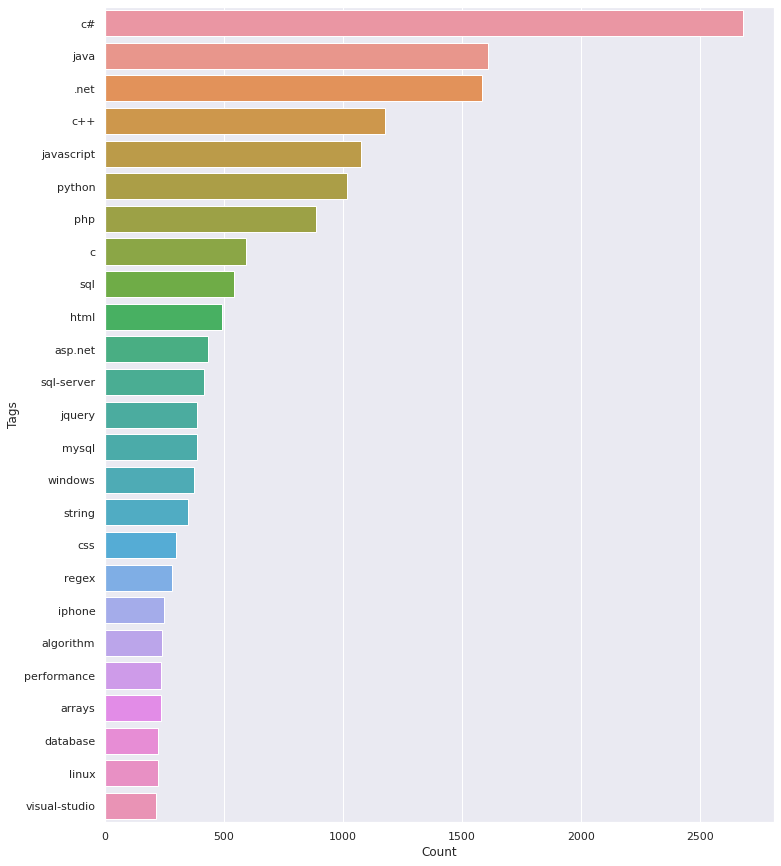

In [ ]:

g = sort_tag.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

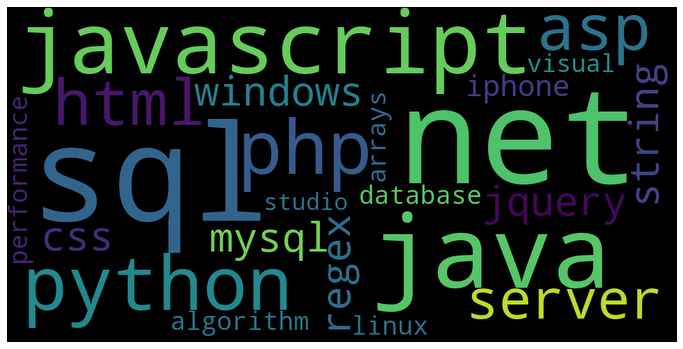

In [ ]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

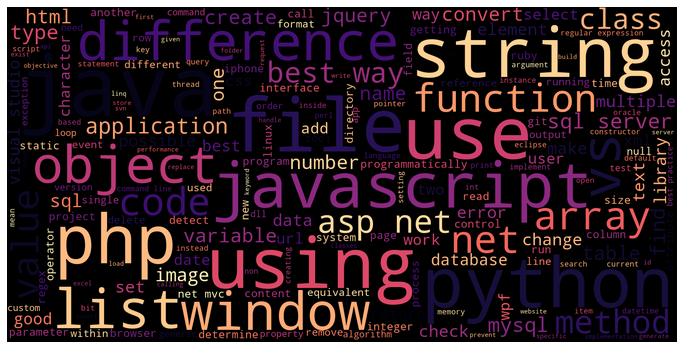

In [ ]:
text = " ".join(review for review in data_raw.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
#Text Mining Algorithms

In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [ ]:
data_raw.columns

Index(['tags', 'title', 'clean_title'], dtype='object')

In [ ]:
#generate one-hot encoding vectors for the tags
mb = MultiLabelBinarizer()
mb.fit(data_raw['tags'])
#mb.fit(sort)
y = mb.transform(data_raw['tags'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(data_raw['clean_title'], y, test_size=0.20, random_state=42)

In [ ]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

(12000, 10000)

In [ ]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [ ]:
xtrain_cv.shape


(12000, 6370)

In [ ]:
evaluation_list=[]


In [ ]:
data_raw

,tags,title,clean_title
0,[c#],Convert Decimal to Double?,convert decimal double
1,"[html, css]",Percentage width child element in absolutely p...,percentage width child element absolutely posi...
2,"[c#, .net]",How do I calculate someone's age in C#?,calculate someone age c
3,[c#],Calculate relative time in C#,calculate relative time c
4,"[javascript, html]",Determine a User's Timezone,determine user timezone
...,...,...,...
14995,[],Insert SQL command with Datetime in MS-Access,insert sql command datetime ms access
14996,[sql],What is the difference between function and pr...,difference function procedure pl sql
14997,[],link to Print in a webpage,link print webpage
14998,[c#],Using c++ library in c#,using c library c


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
mb = MultiLabelBinarizer()
mb.fit(data_raw['tags'])
#mb1.fit(sorted_tags)
y = mb.transform(data_raw['tags'])

In [ ]:
y.shape

(15000, 18)

In [ ]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 52.03
Precision : 0.8506723283793347
Recall    : 0.41721624435959737
F1-score   : 0.55985095482068


In [ ]:
import timeit 

In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)


Title:  How do I remove code duplication between similar const and non-const member functions? 
Predicted tag:  [('c++',)]
Actual tag:  ['c++'] 

Title:  How to align content of a div to the bottom? 
Predicted tag:  [('css', 'html')]
Actual tag:  ['html', 'css'] 

Title:  What is the 'correct' way to store a native pointer inside a Java object? 
Predicted tag:  [('java',)]
Actual tag:  ['java'] 

Title:  How do I position one image on top of another in HTML? 
Predicted tag:  [('html',)]
Actual tag:  ['html', 'css'] 

Title:  Nested Java enum definition - does declaring as static make a difference? 
Predicted tag:  [('java',)]
Actual tag:  ['java'] 

Title:  What's a good Java API for creating Word documents? 
Predicted tag:  [('java',)]
Actual tag:  ['java'] 

Title:  What are some of the pros and cons of using jQuery? 
Predicted tag:  [('javascript', 'jquery')]
Actual tag:  ['asp.net', 'jquery'] 

Title:  Does parenthetical notation for self-invoked functions serve a purpose in Javasc

In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),
        ('time',round(times,3))
     ]))

In [ ]:
#Multinomial Naive Bayes
nbayes = MultinomialNB()
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 30.0
Precision : 0.9075144508670521
Recall    : 0.054494967025338424
F1-score   : 0.10281597904387689


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_nb.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  C# Linq Grouping 
Predicted tag:  [('c#',)]
Actual tag:  ['c#'] 

Time:  0.009565338549998614


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Multinomial Naive Bayes'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),('time',round(times,3))
     ]))

In [ ]:
#Linear SVC
linear_svc = LinearSVC()
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 55.13
Precision : 0.7621675865529353
Recall    : 0.5272474835126693
F1-score   : 0.62330734509643


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_svc.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  How can one create new scopes in python 
Predicted tag:  [('python',)]
Actual tag:  ['python'] 

Title:  stl::multimap - how do i get groups of data? 
Predicted tag:  [('c++',)]
Actual tag:  ['c++'] 

Title:  Create subdomains on the fly with .htaccess (PHP) 
Predicted tag:  [('php',)]
Actual tag:  ['php'] 

Title:  Javascript framework calendar plugin 
Predicted tag:  [('javascript',)]
Actual tag:  ['javascript', 'jquery'] 

Title:  How do I replace text inside a div element? 
Predicted tag:  [('javascript',)]
Actual tag:  ['javascript', 'html'] 

Title:  Why are my PHP sessions dying? And why can't I restore them? 
Predicted tag:  [('php',)]
Actual tag:  ['php'] 

Title:  Which C I/O library should be used in C++ code? 
Predicted tag:  [('c', 'c#', 'c++')]
Actual tag:  ['c++'] 

Time:  0.007884726700001465


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Linear Support vector machine'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),    ('time',round(times,3))

     ]))

In [ ]:
#Random Forest
rforest = RandomForestClassifier(n_estimators=100)
oneVsRest_rf = OneVsRestClassifier(rforest)
oneVsRest_rf.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [ ]:
y_pred = oneVsRest_rf.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 53.57
Precision : 0.817625458996328
Recall    : 0.4637278722665741
F1-score   : 0.5918050941306755


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_rf.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  PHP Readonly Properties? 
Predicted tag:  [('php',)]
Actual tag:  ['php'] 

Title:  What advantages does jQuery have over other JavaScript libraries? 
Predicted tag:  [('javascript', 'jquery')]
Actual tag:  ['javascript', 'jquery'] 

Title:  How do I programmatically check an item in a checkedlistbox in C#? 
Predicted tag:  [('c#',)]
Actual tag:  ['c#'] 

Title:  Objects vs arrays in Javascript for key/value pairs 
Predicted tag:  [('javascript',)]
Actual tag:  ['javascript'] 

Title:  How do I split a huge text file in python 
Predicted tag:  [('python',)]
Actual tag:  ['python'] 

Title:  Using an 'IN' operator with a SQL Command Object and C# 2.0 
Predicted tag:  [('c#',)]
Actual tag:  ['sql'] 

Title:  Code to calculate "median of five" in C# 
Predicted tag:  [('c#',)]
Actual tag:  ['c#'] 

Title:  C++ mark as deprecated 
Predicted tag:  [('c#',)]
Actual tag:  ['c++'] 

Title:  What is the best way to toggle python prints? 
Predicted tag:  [('python',)]
Actual tag:  ['pytho

In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'RandomForestClassifier'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),    ('time',round(times,3))
     ]))

In [ ]:
#display the evaluation result
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1','time']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

,Test Accuracy,Precision,Recall,F1,time
Model,,,,,
Linear Support vector machine,55.13,0.76,0.53,0.62,0.008
RandomForestClassifier,53.57,0.82,0.46,0.59,0.259
Logistic Regression,52.03,0.85,0.42,0.56,0.007
Multinomial Naive Bayes,30.00,0.91,0.05,0.10,0.010
